In [1]:
import os
os.chdir('../../')

In [3]:
import torch
import torch.nn.functional as F

total_samples = 256
save_file = f'/data/optimization/euler_NFE=1000_N={total_samples}_imagenet64.pt'
pairs = torch.load(save_file)
noise = pairs[:, 0]
target = pairs[:, 1]
target = target[:16]
print(target.min(), target.max())
target = (target + 1) / 2
print(noise.shape, target.shape)
print(target.min(), target.max())

tensor(-1.0433) tensor(1.0415)
torch.Size([256, 3, 64, 64]) torch.Size([16, 3, 64, 64])
tensor(-0.0216) tensor(1.0208)


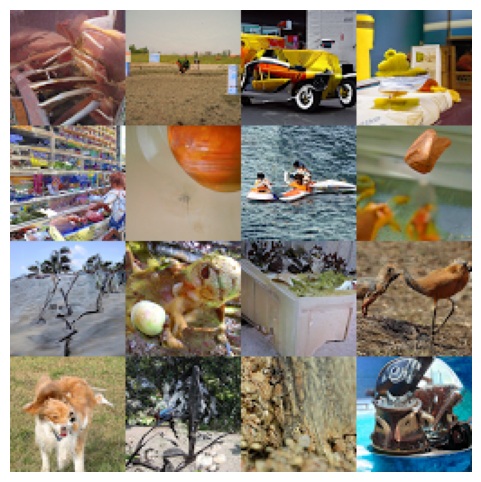

In [4]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import random

from main import parse_args_and_config, Diffusion
from datasets import inverse_data_transform


# (d) 5x5 그리드, padding=0 => 여백 없이
grid = vutils.make_grid(target, nrow=4, padding=0)

# (e) matplotlib 시각화
grid_np = grid.permute(1, 2, 0).cpu().numpy()
grid_np = np.clip(grid_np, 0, 1)

plt.figure(figsize=(6,6))
plt.imshow(grid_np)
plt.axis('off')
plt.show()

In [14]:
target.max()

tensor(1.0373)